# Ex01 - Cálculo da Aceleração (speedup) e Eficiência"


## Instalação / Importação de pacotes

In [ ]:
!pip install matplotlib
!pip install csv
!pip install numpy
!pip install pandas
!pip install dask[distributed]
import matplotlib.pyplot as plt
import io
from google.colab import files
import pandas as pd
import csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Carregamento dos dados (CSV)

In [ ]:
#Leitura do arquivo CSV disponibilizado (selecionando localmente).

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['exp.csv']))

Saving exp.csv to exp.csv


In [ ]:
df

,p,time
0,1,10.99
1,2,10.84
2,6,10.00
3,10,9.19
4,14,8.42
5,18,7.67
6,22,6.71
7,26,5.84
8,30,5.03
9,34,4.43


In [ ]:
tseq = df.query('p == 1')['time'].iloc[0]
tseq
df = df.assign(seq = tseq)
df = df.assign(speedup = df['seq']/df['time'])
df = df.assign(eficiencia = df['speedup']/df['p'])
df

,p,time,seq,speedup,eficiencia
0,1,10.99,10.99,1.000000,1.000000
1,2,10.84,10.99,1.013838,0.506919
2,6,10.00,10.99,1.099000,0.183167
3,10,9.19,10.99,1.195865,0.119587
4,14,8.42,10.99,1.305226,0.093230
5,18,7.67,10.99,1.432855,0.079603
6,22,6.71,10.99,1.637854,0.074448
7,26,5.84,10.99,1.881849,0.072379
8,30,5.03,10.99,2.184891,0.072830
9,34,4.43,10.99,2.480813,0.072965


## Gráfico da aceleração

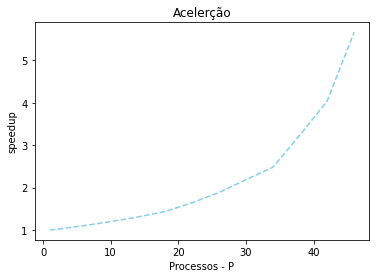

In [ ]:
# Draw plot
plt.plot( 'p', 'speedup', data=df, color='skyblue', linestyle='dashed')
plt.title("Acelerção")
plt.xlabel("Processos - P")
plt.ylabel("speedup")

plt.show()

Aparentemente o aumento da aceleração segue, de alguma forma, o aumento no número dos processos.

## Gráfico da eficiência

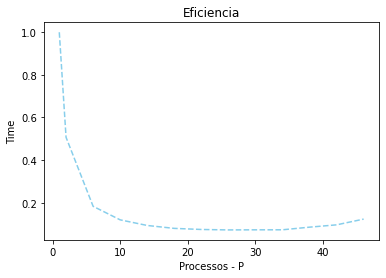

In [ ]:
# Draw plot
plt.plot( 'p', 'eficiencia', data=df, color='skyblue', linestyle='dashed')
plt.title("Eficiencia")
plt.xlabel("Processos - P")
plt.ylabel("Time")

plt.show()

Notamos que a eficência tem uma queda acentuada até o trigésimo processo, após esse número há uma discreta recuperação dessa medida de desempenho.

## Salvando os dados das medidas de desempenho em arquivo CSV.


In [ ]:
df.to_csv('medidas_de_desempenho.csv', encoding = 'utf-8-sig') 
files.download('medidas_de_desempenho.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>